# Rendering and Animation

In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys
import numpy as np
import pandas as pd 
current_folder = Path.cwd()
parent_folder = current_folder.parent
sys.path.insert(0, str(parent_folder))

from rplh.rendering.render_state import *
from rplh.rendering.animations import *

# Rendering of States

In [4]:
pg_state_0 =  {"0.5_0.5": ["box_blue", "target_blue", "target_red", "box_green", "target_purple", "box_purple"], 
               "0.5_1.5": ["box_blue", "box_red", "box_purple", "box_purple", "box_orange"], 
               "1.5_0.5": ["target_blue", "target_red", "target_green", "target_purple", "target_purple", "target_orange"], 
               "1.5_1.5": ["target_blue", "box_blue", "box_red"]}

action_0 = {'Agent[0.5, 0.5]': 'move(box_blue, target_blue)', 
            'Agent[1.5, 1.5]': 'move(box_red, square[1.5, 0.5])'}

action_1 = {'Agent[1.5, 1.5]': 'move(box_blue, target_blue)', 
            'Agent[1.5, 0.5]': 'move(box_red, target_red)'}


action = transform_action(action_0)
action_list_raw = [action_0, action_1]
box_map, action_list = trans_data(pg_state_0, action_list_raw)
print("box map:", box_map)
print("-------------------------------------------------------------------------------------------")
print("action_list:", action_list)

box map: {(0.5, 0.5): [['box', 'blue', 0], ['target', 'blue', 1], ['target', 'red', 2], ['box', 'green', 3], ['target', 'purple', 4], ['box', 'purple', 5]], (0.5, 1.5): [['box', 'blue', 0], ['box', 'red', 1], ['box', 'purple', 2], ['box', 'purple', 3], ['box', 'orange', 4]], (1.5, 0.5): [['target', 'blue', 0], ['target', 'red', 1], ['target', 'green', 2], ['target', 'purple', 3], ['target', 'purple', 4], ['target', 'orange', 5]], (1.5, 1.5): [['target', 'blue', 0], ['box', 'blue', 1], ['box', 'red', 2]]}
-------------------------------------------------------------------------------------------
action_list: [{(0.5, 0.5): ('box_blue', 'target_blue'), (1.5, 1.5): ('box_red', (1.5, 0.5))}, {(1.5, 1.5): ('box_blue', 'target_blue'), (1.5, 0.5): ('box_red', 'target_red')}]


In [6]:
print(box_map)

{(0.5, 0.5): [['box', 'blue', 0], ['target', 'blue', 1], ['target', 'red', 2], ['box', 'green', 3], ['target', 'purple', 4], ['box', 'purple', 5]], (0.5, 1.5): [['box', 'blue', 0], ['box', 'red', 1], ['box', 'purple', 2], ['box', 'purple', 3], ['box', 'orange', 4]], (1.5, 0.5): [['target', 'blue', 0], ['target', 'red', 1], ['target', 'green', 2], ['target', 'purple', 3], ['target', 'purple', 4], ['target', 'orange', 5]], (1.5, 1.5): [['target', 'blue', 0], ['box', 'blue', 1], ['box', 'red', 2]]}


In [8]:
pd.DataFrame(map_df(box_map)).reset_index()

ValueError: too many values to unpack (expected 2)

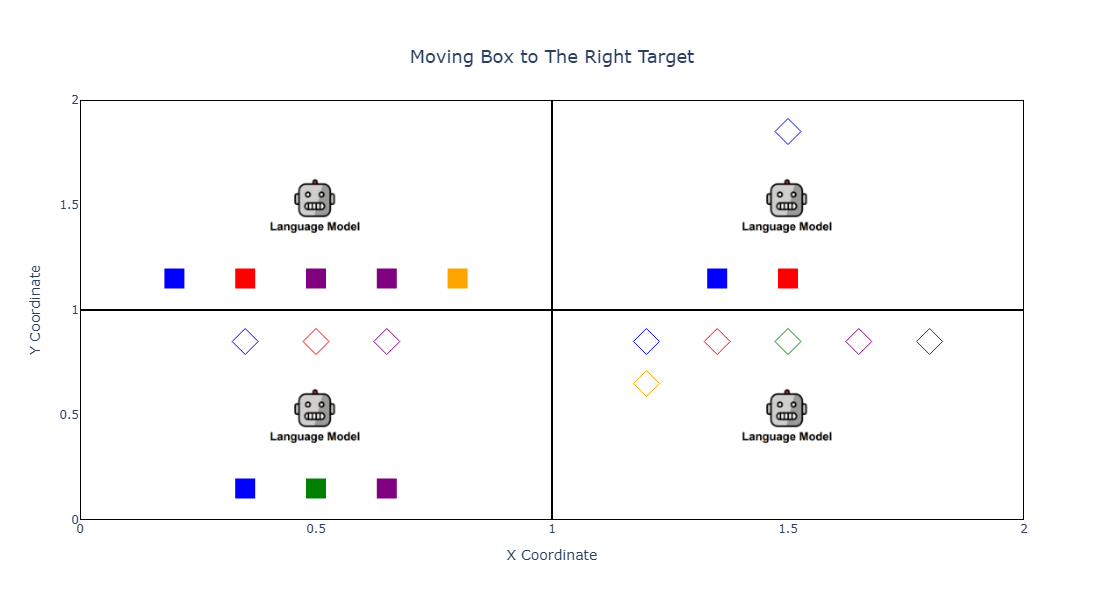

In [7]:
render_graph(box_map)

In [11]:
# state = {"0.5_0.5": ["target_blue", "box_blue", "target_orange"], 
#      "0.5_1.5": ["box_orange", "target_green", "target_blue"], 
#      "1.5_0.5": ["box_green", "target_green", "box_green"], 
#      "1.5_1.5": ["box_blue"]}

# render_state, a_lst = trans_data(state, []) 

# render_graph(render_state)

In [12]:
# action_0 = {'Agent[0.5, 0.5]': 'move(box_blue, target_blue)', 
#             'Agent[0.5, 1.5]': 'move(box_orange, square[0.5, 0.5])', 
#             'Agent[1.5, 0.5]': 'move(box_green, target_green)', 
#             'Agent[1.5, 1.5]': 'move(box_blue, square[0.5, 1.5])'
#             }

# # render_state_1, a_lst = trans_data(state, [transform_action(action_0)])

# state = {"0.5_0.5": ["target_orange", "box_orange"], 
#      "0.5_1.5": ["target_green", "target_blue", "box_blue"], 
#      "1.5_0.5": ["box_green"], 
#      "1.5_1.5": []}

# render_state, a_lst = trans_data(state, []) 

# render_graph(render_state)

# Rendering Actions + States

In [9]:
# render_graph(box_map)

# Rendering Animations

In [15]:
# parent_folder = current_folder.parent
# path = parent_folder / "demos" / "converging_samples" / "rplh_efficient_2" / "pg_state"
# render_maps_as_video(path)

In [46]:
def action_from_response(
    pg_dict_input: dict[str, list[str]], original_response_dict: dict
) -> tuple[str, dict[str, list[str]]]:
    """
    Updates the environment state based on the actions in the response.

    Args:
        pg_dict_input (dict[str, list[str]]): Current state of the playground.
        original_response_dict (dict): Actions to be executed.

    Returns:
        tuple[str, Dict[str, list[str]]]: Feedback string and updated playground state.
    """
    system_error_feedback = ""
    pg_dict_original = copy.deepcopy(pg_dict_input)
    transformed_dict = {}
    for key, value in original_response_dict.items():
        coordinates = tuple(map(float, re.findall(r"\d+\.?\d*", key)))

        # match the item and location in the value
        match = re.match(r"move\((.*?),\s(.*?)\)", value)
        if match:
            item, location = match.groups()
            if "square" in location:
                location = tuple(map(float, re.findall(r"\d+\.?\d*", location)))
            transformed_dict[coordinates] = [item, location]
    for key, value in transformed_dict.items():
        print(f"Key: {key}, Value1: {value[0]}, Value2: {value[1]}")
        if (
            value[0] in pg_dict_original[str(key[0]) + "_" + str(key[1])]
            and type(value[1]) == tuple
            and (
                (
                    np.abs(key[0] - value[1][0]) == 0
                    and np.abs(key[1] - value[1][1]) == 1
                )
                or (
                    np.abs(key[0] - value[1][0]) == 1
                    and np.abs(key[1] - value[1][1]) == 0
                )
            )
        ):
            pg_dict_original[str(key[0]) + "_" + str(key[1])].remove(value[0])
            pg_dict_original[str(value[1][0]) + "_" + str(value[1][1])].append(value[0])
        elif (
            value[0] in pg_dict_original[str(key[0]) + "_" + str(key[1])]
            and type(value[1]) == str
            and value[1] in pg_dict_original[str(key[0]) + "_" + str(key[1])]
            and value[0][:4] == "box_"
            and value[1][:7] == "target_"
            and value[0][4:] == value[1][7:]
        ):
            print(key)
            pg_dict_original[str(key[0]) + "_" + str(key[1])].remove(value[0])
            print(key)
            pg_dict_original[str(key[0]) + "_" + str(key[1])].remove(value[1])
        else:
            # print(f"Error, Iteration Num: {iteration_num}, Key: {key}, Value1: {value[0]}, Value2: {value[1]}")
            system_error_feedback += f"Your assigned task for {key[0]}_{key[1]} is not in the doable action list; "

    return system_error_feedback, pg_dict_original


In [ ]:
def render_animation(pg_dict_input, action_list):
    
    return
    

In [48]:
print(action_0)

{'Agent[0.5, 0.5]': 'move(box_blue, target_blue)', 'Agent[1.5, 1.5]': 'move(box_red, square[1.5, 0.5])'}


In [50]:
action_from_response(pg_state_0, action_0)[1]

Key: (0.5, 0.5), Value1: box_blue, Value2: target_blue
(0.5, 0.5)
(0.5, 0.5)
Key: (1.5, 1.5), Value1: box_red, Value2: (1.5, 0.5)


{'0.5_0.5': ['target_red', 'box_green', 'target_purple', 'box_purple'],
 '0.5_1.5': ['box_blue', 'box_red', 'box_purple', 'box_purple', 'box_orange'],
 '1.5_0.5': ['target_blue',
  'target_red',
  'target_green',
  'target_purple',
  'target_purple',
  'target_orange',
  'box_red'],
 '1.5_1.5': ['target_blue', 'box_blue']}